# Satellite tools

In [1]:
import pylab as plt

from ska_ost_low_uv.io import read_uvx
from ska_ost_low_uv.postx import ApertureArray
from ska_ost_low_uv.utils import get_test_data

## Load test dataset

Load test data with a known satellite detection (SVOM).

In [2]:
uvx = read_uvx(get_test_data('satellites/s81-svom.uvx'))
aa = ApertureArray(uvx)

aa.coords.satellites.help()

<Aperture Array module: satellites>

Satellite coordinate utils.

Provides the following methods:
    compute_satellite_altaz() - Compute the ALT/AZ for a satellite viewed by an aperture array.
    compute_satellite_radec() - Compute the RA/DEC for a satellite viewed by an aperture array.
    help() - Print help for this class module.
    load_tles() - Load the TLE data, assuming three lines per entry.
    satchecker_above_horizon() - Return list of satellites above the horizon.
    satchecker_get_tle() - Get TLE record from satchecker.
    satchecker_lookup_norad() - Search for NORAD ID for a given satellite.


### Load TLEs

Load some TLEs from test data included in the ska-ost-low-uv package.

In [3]:
tle_file = get_test_data('satellites/tles_2025.01.22.txt')
tle_dict = aa.coords.satellites.load_tles(tle_file)
tle_dict

{'CATCH-1': <sgp4.wrapper.Satrec at 0x10afbd210>,
 'SVOM': <sgp4.wrapper.Satrec at 0x10afd6210>,
 'STARLINK-31441': <sgp4.wrapper.Satrec at 0x10afd6810>,
 'STARLINK-32044': <sgp4.wrapper.Satrec at 0x10afc2210>,
 'STARLINK-31239': <sgp4.wrapper.Satrec at 0x10afc2810>,
 'STARLINK-32007': <sgp4.wrapper.Satrec at 0x10afc2e10>,
 'STARLINK-32028': <sgp4.wrapper.Satrec at 0x10afc3410>,
 'STARLINK-32016': <sgp4.wrapper.Satrec at 0x10afc3a10>,
 'STARLINK-32003': <sgp4.wrapper.Satrec at 0x10afc4010>,
 'STARLINK-32026': <sgp4.wrapper.Satrec at 0x10afc4610>,
 'STARLINK-31732': <sgp4.wrapper.Satrec at 0x10afc4c10>}

## Compute satellite position

Now we can compute satellite positions

In [4]:
aa.coords.satellites.compute_satellite_radec(tle_dict['SVOM'])

<SkyCoord (ICRS): (ra, dec) in deg
    (325.94274717, 23.23994588)>

In [5]:
aa.coords.satellites.compute_satellite_altaz(tle_dict['SVOM'])

<AltAz Coordinate (obstime=1737524856.8626106, location=(-2561233.1178948376, 5085888.895423639, -2864153.978239534) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, km)
    (0.90135915, 39.78417633, 919.69381366)>

## Overlay satellite position on plot

The viewer can overlay both astropy `SkyCoord` sources and SGP4 `Satrec` sources.

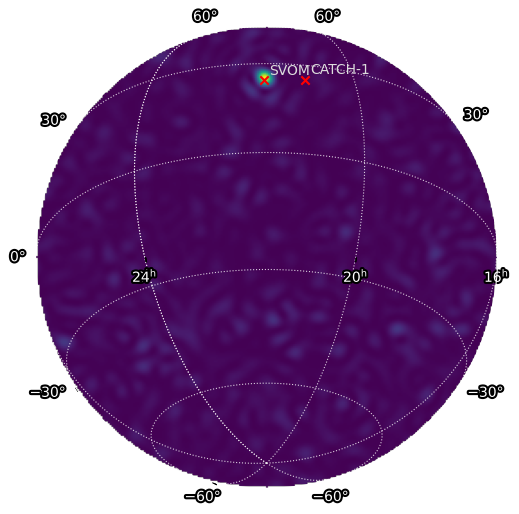

In [6]:
img = aa.imaging.make_image(n_pix=257)
aa.viewer.skycat = tle_dict

plt.figure(figsize=(8, 6))
aa.viewer.orthview(img, overlay_srcs=True, reuse_fig=True, title='')

## Use SatChecker lookup

We can also query the IAU [SatChecker](https://satchecker.readthedocs.io/) tool from IAU Centre for the Protection of the Dark and Quiet Sky from Satellite Constellation Interference.

In [7]:
svom_tle = aa.coords.satellites.satchecker_get_tle(t=aa.t[0], name='SVOM')

aa.coords.satellites.compute_satellite_radec(svom_tle)

<SkyCoord (ICRS): (ra, dec) in deg
    (325.94492201, 23.23694526)>

In [8]:
satloc_dict = aa.coords.satellites.satchecker_above_horizon(min_altitude=45)

In [9]:
print(len(satloc_dict))

432
